In [17]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df = pd.read_csv(
    Path("MBA.csv"),                
    index_col="application_id"
)

# Review the DataFrame
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
application_id,,,,,,,,,
1,Female,False,3.30,Business,Asian,620,3,Financial Services,Admit
3,Female,True,3.30,Business,NaN,710,5,Technology,Admit
7,Female,False,2.93,STEM,Other,590,3,Technology,Admit
15,Female,False,3.03,STEM,White,600,5,Technology,Admit
16,Female,True,3.05,Humanities,NaN,710,4,Consulting,Admit


In [3]:
# Generate our categorical variable lists and check the number of unique values in each column

data_cat = df.dtypes[df.dtypes == 'object'].index.tolist()
df[data_cat].nunique()

gender            2
major             3
race              5
work_industry    14
admission         2
dtype: int64

In [4]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[data_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(data_cat)

encode_df.head()

,gender_Female,gender_Male,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Other,race_White,...,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admission_Admit,admission_Waitlist,admission_nan
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(data_cat, axis=1)
df.head()

,international,gpa,gmat,work_exp,gender_Female,gender_Male,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admission_Admit,admission_Waitlist,admission_nan
1,False,3.30,620,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,True,3.30,710,5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,False,2.93,590,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,False,3.03,600,5,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,True,3.05,710,4,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Rename nan value column
df = df.rename(columns={'admission_nan': 'rejected'})

df.head()

,international,gpa,gmat,work_exp,gender_Female,gender_Male,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admission_Admit,admission_Waitlist,rejected
1,False,3.30,620,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,True,3.30,710,5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,False,2.93,590,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,False,3.03,600,5,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,True,3.05,710,4,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = df['admission_Admit'].values
X = df.drop(['admission_Admit', 'admission_Waitlist', 'rejected'], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
X

,international,gpa,gmat,work_exp,gender_Female,gender_Male,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
1,False,3.30,620,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,True,3.30,710,5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,False,2.93,590,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,False,3.03,600,5,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,True,3.05,710,4,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,False,3.03,570,6,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6189,False,3.12,630,4,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6190,False,3.49,640,5,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6191,False,3.18,670,4,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [26]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1293,12
Actual 1,240,4


Accuracy Score : 0.8373143963847643
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      1305
         1.0       0.25      0.02      0.03       244

    accuracy                           0.84      1549
   macro avg       0.55      0.50      0.47      1549
weighted avg       0.75      0.84      0.77      1549



In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.28222022321564033, 'gpa'),
 (0.217643939386092, 'gmat'),
 (0.11798765103512766, 'work_exp'),
 (0.04016098512598762, 'international'),
 (0.02595510272966182, 'major_Humanities'),
 (0.02451720428078725, 'major_STEM'),
 (0.024202054766652496, 'major_Business'),
 (0.023267762403098816, 'work_industry_Consulting'),
 (0.021206861216394052, 'race_nan'),
 (0.020192471613296282, 'race_White'),
 (0.017929022151535485, 'work_industry_Technology'),
 (0.01739559774002134, 'race_Asian'),
 (0.016892568811705477, 'work_industry_PE/VC'),
 (0.015543118084071333, 'work_industry_Nonprofit/Gov'),
 (0.015345387102997151, 'work_industry_Investment Banking'),
 (0.013389712569194584, 'work_industry_Financial Services'),
 (0.012073424530846328, 'work_industry_Other'),
 (0.011524951817417882, 'race_Hispanic'),
 (0.011134200625951506, 'race_Black'),
 (0.010871111645469608, 'work_industry_Health Care'),
 (0.01008611999383075, 'gender_Male'),
 (0.009947829594741437, 'race_Other'),
 (0.009785688735098939, 'work_

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

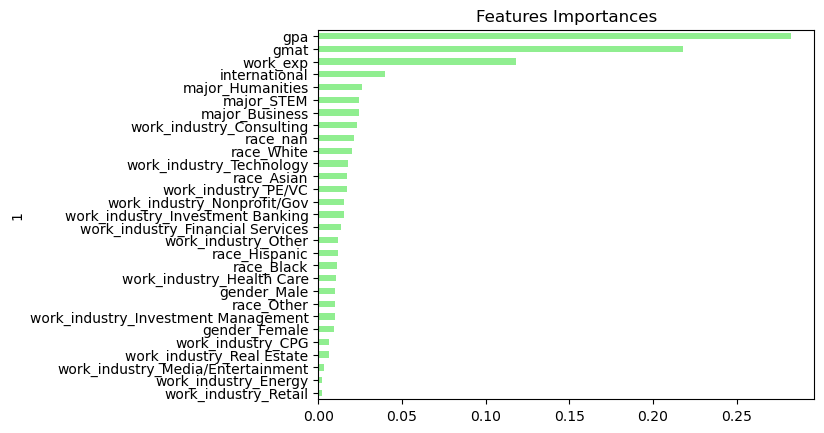

In [30]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)